# Classify Class


### Introduction

The purpose of this is to demonstrate the class Classify that I wrote. The purpose of the class is to be a place that automatically performs basic functions such as cross validation and model comparison for classification tasks. Some choices had to be made about how to do things which may or may not applicable in your case. There may be an argument to toggle what you need in the method used. I will demonstrate and expain the capabilities allong the way.

All of the code for this is in my github [BeautifulStatistics](https://github.com/beautifulstatistics/Classify). and at my portfolio page [BeautifulStatistics.com](BeautifulStatistics.com)

### Data

The data used is from my work as a graduate student. The predictors are the output of Language Inquiry and Word Count (LIWC) for each of almost 900 news articles. The response is the same articles that used the Mechanical Turk to label each one as 'Controversial', 'Somewhat Controversial', or 'Not Controversial'.

### Data Input and Initialization

In [1]:
from Classify import Classify
import pandas as pd

titles = pd.read_pickle("titles.pkl") # predictors
titles_r = pd.read_pickle("titles_r.pkl") #response

clf = Classify()

In [2]:
help(Classify.data)

Help on function data in module Classify:

data(self, X, y, level_order=None, label=None, priors=None, folds=5)
    X : predictors
    
    y : response
    
    level_order : order you want the levels to be displayed. It will use 
    lexiographic (alphanumeric) order if not specified (from method .sort())
    
    label : the label you are interested in. 'average' is chosen if 'None' is input.
    
    priors : given priors. empirical if not specified.
    
    folds : the number of folds you wish to evaluate the data on.



Next we add the data. A bunch of data validation checks are done to make sure everything is in order to add different fits. There are too many to demonstrate, but here is one:

In [3]:
clf.data(9,titles_r)

X must covertable to pd.DataFrame!


We input the data and specify which label we are interested in. It gives us a little output with some relevent information. We only need to input the data once as it will be used for all fits.

In [4]:
clf.data(titles,titles_r,label='Controversial')

Your data has been validated to work with sklearn.

Name         Value
---------  -------
N Rows         893
M Columns       32
levels           3


Levels                     Prior
----------------------  --------
Controversial           0.293393
Not Controversial       0.223964
Somewhat Controversial  0.482643



### clf.suite() method

Now we can do different things. First we can start adding whatever fits we want with the clf.add_fit() method, but the better option is to call clf.suite(), which will add a suite of classifiers with the default values, except for max_iter, which is raised to 100,000.

In [5]:
help(clf.suite)

Help on method suite in module Classify:

suite(max_iter=100000) method of Classify.Classify instance
    This adds a suite of classifiers at their default values, excpet for a raised max_iter.
    
    max_iter: the number of iterations before timeout.
    
    The classifiers added are:
    
    GaussianNB
    LinearSVC
    SVC
    DecisionTreeClassifier
    ExtraTreeClassifier
    AdaBoostClassifier
    BaggingClassifier
    RandomForestClassifier
    GradientBoostingClassifier
    LogisticRegression
    PassiveAggressiveClassifier
    Perceptron
    RidgeClassifier
    SGDClassifier
    MLPClassifier
    KNeighborsClassifier



When we call clf.suite() it adds each of the above. This does by default 5 fold cross validations with CalibratedClassifierCV as a wrapper (for more honest results), computes the precsion/recall curves, then gets the average precision for each conditioned on level and cross validation and computes standard deviation across each for a measure of stability.

In [6]:
clf.suite()

Adding a suite of classifiers with default parameters.

Processing GaussianNB: Added.
Processing LinearSVC: Added.
Processing SVC: Added.
Processing DecisionTreeClassifier: Added.
Processing ExtraTreeClassifier: Added.
Processing AdaBoostClassifier: Added.
Processing BaggingClassifier: Added.
Processing RandomForestClassifier: Added.
Processing GradientBoostingClassifier: Added.
Processing LogisticRegression: Added.
Processing PassiveAggressiveClassifier: Added.
Processing Perceptron: Added.
Processing RidgeClassifier: Added.
Processing SGDClassifier: Added.
Processing MLPClassifier: Added.
Processing KNeighborsClassifier: Added.

Finished Adding Classifiers



### clf.compare() method
We can now call clf.compare() to see the results. Lets first look at the docstring.

In [7]:
help(clf.compare)

Help on method compare in module Classify:

compare(label=None, topn=-1) method of Classify.Classify instance
    This function compares all the fits stored using average precision (AP).
    
    label : The label specified when self.data() was called, defaulted to 'average' if 'None',
    or whatever label you want.
    
    topn : list only the top n fits as given by average precision. -1 means all fits.




Positive label is Controversial

Model Name                      E(AP)    SD(AP|level=Controversial)
---------------------------  --------  ----------------------------
perfect                      1
SVC                          0.559537                     0.0229181
RandomForestClassifier       0.540096                     0.0358626
RidgeClassifier              0.53228                      0.0215802
LinearSVC                    0.529225                     0.0251919
LogisticRegression           0.526938                     0.043285
GaussianNB                   0.519082                     0.0226278
GradientBoostingClassifier   0.510952                     0.0316952
AdaBoostClassifier           0.506606                     0.038775
SGDClassifier                0.503255                     0.0188318
PassiveAggressiveClassifier  0.498776                     0.030016
BaggingClassifier            0.493719                     0.0307252
MLPClassifier                0.486721                 

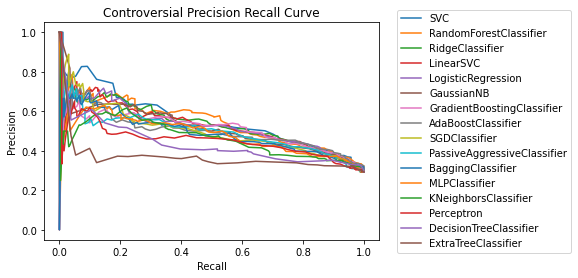

In [8]:
clf.compare()

The SD(AP|level) above conditions on the level chosen, so is actually a measure of the stability of the cross validations. We can look at a different label. We put 'Controverisal' when we input the data, so lets look at the average performance.


AP is averaged across all levels and cross validation subsets. 

Model Name                      E(AP)    SD(AP|Average Level)    SD(AP|Average Validation)
---------------------------  --------  ----------------------  ---------------------------
perfect                      1
SVC                          0.617122              0.0247105                     0.0792511
RidgeClassifier              0.610671              0.0267808                     0.101316
LinearSVC                    0.605689              0.0312455                     0.0999141
RandomForestClassifier       0.60417               0.0195225                     0.105875
LogisticRegression           0.601497              0.033989                      0.0985052
GradientBoostingClassifier   0.578999              0.0229626                     0.114586
SGDClassifier                0.578636              0.0315166                     0.110734
AdaBoostClassifier           0.572554              0.0457767                     0.10389

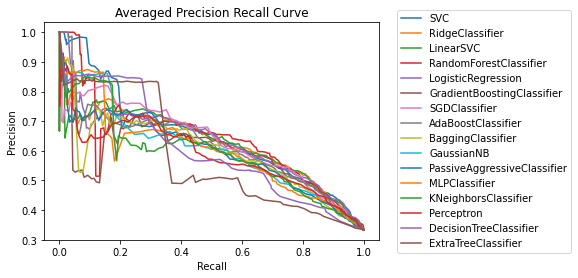

In [9]:
clf.compare(label='average')

But this is just too many for a good graph. Lets look at 'controverisal', but only the top 3. 


Positive label is Controversial

Model Name                 E(AP)    SD(AP|level=Controversial)
----------------------  --------  ----------------------------
perfect                 1
SVC                     0.559537                     0.0229181
RandomForestClassifier  0.540096                     0.0358626
RidgeClassifier         0.53228                      0.0215802
prior only              0.293393


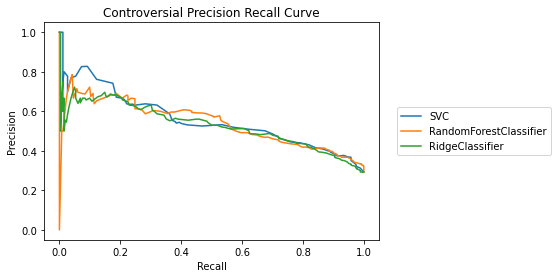

In [10]:
clf.compare(topn=3)

### clf.inspect() method
We can look closer at any one we want using the method clf.inspect() to get a good idea of the classifier as a whole.

Level Name                E(AP|Level)    SD(AP|Level)    E(AP|Prior Only)
----------------------  -------------  --------------  ------------------
Controversial                0.559537       0.0229181            0.293393
Not Controversial            0.686029       0.0584313            0.223964
Somewhat Controversial       0.605801       0.031311             0.482643
Averaged                     0.617122       0.0247105            0.369183

Cross Validation      E(AP|Cross Validation)    SD(AP|Cross Validation)
------------------  ------------------------  -------------------------
0                                   0.617122                  0.052257
1                                   0.619028                  0.0734976
2                                   0.620137                  0.061055
3                                   0.682591                  0.0792511
4                                   0.641288                  0.0386691
Averaged                            0.61825          

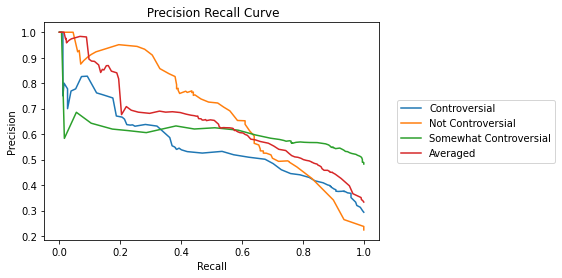

In [11]:
clf.inspect('SVC')

### clf.add_fit() method
We can then take the best one and tune it. Unfortunately, this class does not have the ability to do automatic tuning. We have to do tuning ourselves and add it with the clf.add_fit() method.

A quick look at the docstring.

In [12]:
help(clf.add_fit)

Help on method add_fit in module Classify:

add_fit(clf, name=None, replace=False, params=None) method of Classify.Classify instance
    This will add a specific classifier.
    
    clf : an instance of a classifier.
    
    name : what you want to call it, by default it is the class name. If the name
    already exists it will numerate them.
    
    replace: if the name already exists but you want to repalce it, set to True.



We'll load two hyperparameter tunings that I had done previously, one on SVC and one on RandomForestClassifer. If you were to do these you can use clf.label_bins for the binnerized responses, and clf.label_bins[:,clf.label_position] for the binned particular label you are interested in.

We can let the class choose for itself what name to give it (in this case it would be SVC1), or specify what name we want to call it. We can set the parameters before we input, or use the params argument. The latter stores the paramaters to display in the clf.inspect() method.

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle as pi

with open('svc_params.pkl','rb') as f:
    svc_params = pi.load(f)

    
with open('rf_params.pkl','rb') as f:
    rf_params = pi.load(f)

clf.add_fit(SVC(),params=svc_params,name='SVC_optim')
clf.add_fit(RandomForestClassifier(),params=rf_params,name='RF_optim')

Processing SVC_optim: Added.
Processing RF_optim: Added.


In [ ]:
clf.compare(topn=4)

### clf.remove()

And lastly, there is a clf.remove() method to remove fits. Remove the fit by name, or use the keepn to keep the best n. The by_label argument is label to use in deciding which to remove. It defaults to the label chosen when you called clf.data. This is 'average' if none is chosen.

In [15]:
help(clf.remove)

Help on method remove in module Classify:

remove(name=None, keepn=None, by_label=None) method of Classify.Classify instance
    To remove fits.
    
    name: the name of the classifier to remove.
    
    keepn: the number of top classifiers to keep. all other will be removed.
    
    by_label: the label you care about. Keepn will use this label to chose which
    ones to remove.



In [16]:
clf.remove(keepn=4)

Deleted RidgeClassifier.
Deleted LinearSVC.
Deleted LogisticRegression.
Deleted GaussianNB.
Deleted GradientBoostingClassifier.
Deleted AdaBoostClassifier.
Deleted SGDClassifier.
Deleted PassiveAggressiveClassifier.
Deleted BaggingClassifier.
Deleted MLPClassifier.
Deleted KNeighborsClassifier.
Deleted Perceptron.
Deleted DecisionTreeClassifier.
Deleted ExtraTreeClassifier.



Positive label is Controversial

Model Name                 E(AP)    SD(AP|level=Controversial)
----------------------  --------  ----------------------------
perfect                 1
SVC                     0.559537                     0.0229181
RF_optim                0.559331                     0.0308966
SVC_optim               0.5504                       0.0206952
RandomForestClassifier  0.540096                     0.0358626
prior only              0.293393


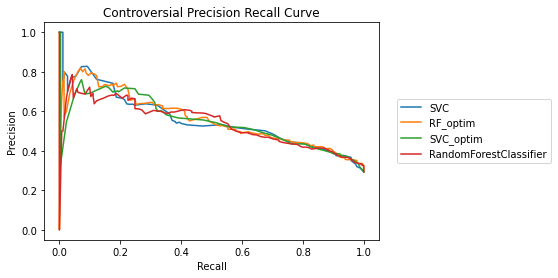

In [17]:
clf.compare()

And lets look at our model with inspect.

Level Name                E(AP|Level)    SD(AP|Level)    E(AP|Prior Only)
----------------------  -------------  --------------  ------------------
Controversial                0.5504         0.0206952            0.293393
Not Controversial            0.681511       0.0619572            0.223964
Somewhat Controversial       0.598518       0.0503377            0.482643
Averaged                     0.610143       0.0297369            0.369183

Cross Validation      E(AP|Cross Validation)    SD(AP|Cross Validation)
------------------  ------------------------  -------------------------
0                                   0.610143                  0.0541535
1                                   0.611632                  0.0698564
2                                   0.616274                  0.0581642
3                                   0.691538                  0.0900099
4                                   0.616823                  0.0702945
Averaged                            0.632843       

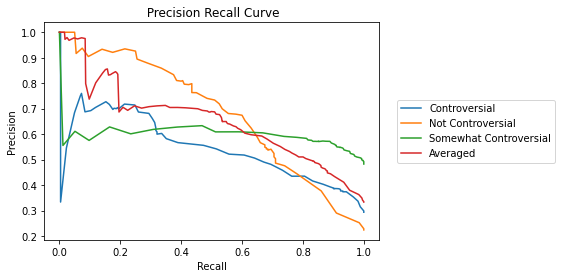

In [19]:
clf.inspect('SVC_optim')

### Notes

One can go and tune the hyperparameters of any model and add them to the instance of the class. By adding with the params argument you can better keep track of the parameters you used for that model. 

The class uses CalibratedClassifierCV as a wrapper for your classifier so it is possible that your 'tuned' model may not perform the same way it does without this wrapper. The calibration often causes the values reported to be lower then they would otherwise, but more accuratly describes the behavior of the models in the real world. The calibrated classifier errs on the side reporting slighly less impressive results, which is the less eggregious of the two. Reporting overoptimistic results can be a problem when we fit 16+ models!

A clf.optimize() method is a possible additional method to add, but additing it to clf.suite() is not workable because tuning a large number of classifiers is computationally intensive.

Average Precision (AP) was chosen as the metric to base everything around because it can handle class imbalance and balanced class equally well. One Vs Rest was used for self.L > 2, when the number of response levels are greater than 2. This was done manually instead of by the OneVsRestClassifier for more control over the curves. 

The curves were also calculated by hand using a moving decision boundary at np.linspace(0,1,num=200), for all curves. This was done in order to get the average curve conditioned at each decision boundary. This is why the average curve may not be exactly in the middle between the other curves on the precision-recall graph. A graph of each by the decision boundary would look exactly as expected.

For all the values used for all the displays the attribute clf.fits is a dictionary of everything. So clf.fits['SVC'] has all the curves, AP's, SD(AP), etc.

### Conclusion

The hope this helps future classification tasks I have be more orderly. The greatest strength of this class is to be able to quickly throw a bunch of classifiers at the problem and only have to tune a few of them. Or also provides an order from which to start tuning. There is no guantee that the highest tuned model will be the best after all are tuned, but if the model is the best at default, then it has a higher probability to be the best after tuned. 